In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap
import seaborn as sns

# Preprocessing
Data Loading and Dimensionality Check

In [2]:
df = pd.read_csv('data/yeast.csv')
print("Dataset.shape:", df.shape)

X = df.iloc[:, :-14]   

def clean_label(val):
    if isinstance(val, str):
        val = val.strip()
        val = val.replace("b'", "").replace("'", "")
    return int(val)

Y = df.iloc[:, -14:].map(clean_label)

print("X.shape:", X.shape)
display(X.head())

print("Y.shape:", Y.shape)
display(Y.head())

print("Descriptive stats:")
display(X.describe())


Dataset.shape: (2417, 117)
X.shape: (2417, 103)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


Y.shape: (2417, 14)


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Descriptive stats:


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


# Label Selection

In [3]:
label_counts = Y.sum().sort_values(ascending=False)
top_labels = label_counts.index[:2].tolist()

def assign_category(row):
    if row[top_labels[0]] == 1 and row[top_labels[1]] == 0:
        return top_labels[0]
    elif row[top_labels[1]] == 1 and row[top_labels[0]] == 0:
        return top_labels[1]
    elif row[top_labels[0]] == 1 and row[top_labels[1]] == 1:
        return "Combo"
    else:
        return "Other"

categories = Y.apply(assign_category, axis=1)

In [4]:
colors = sns.color_palette("colorblind", n_colors=len(categories.unique()))

# Standardization
Distance-based dimensionality reduction techniques (like **t-SNE** and **Isomap**) rely on pairwise distances between points in the feature space. If features are measured on different scales, those with larger numerical ranges will dominate the distance computation, regardless of their actual importance.

For example:

* Suppose one gene expression feature ranges between `0–1000`, while another ranges between `0–1`.
* Without scaling, the first feature contributes almost all of the distance, drowning out the second.
* As a result, the embedding would be biased and fail to capture the true relationships in the data.

**Standardization** (zero mean, unit variance per feature) ensures that:

* All features contribute equally to the distance metric.
* t-SNE and Isomap focus on *patterns of variation* rather than raw magnitude differences.



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE and Veracity Inspection

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [7]:
perplexities = [5, 10, 20, 30, 40, 50]
results_tsne = []

In [8]:
import matplotlib.patches as mpatches

okabe_ito = [
     "#009E73",
    "#0072B2", "#D55E00"
]
# Assign colors to each category code
codes = pd.Categorical(categories).codes
unique_cats = pd.Categorical(categories).categories
colors = [okabe_ito[i % len(okabe_ito)] for i in codes]

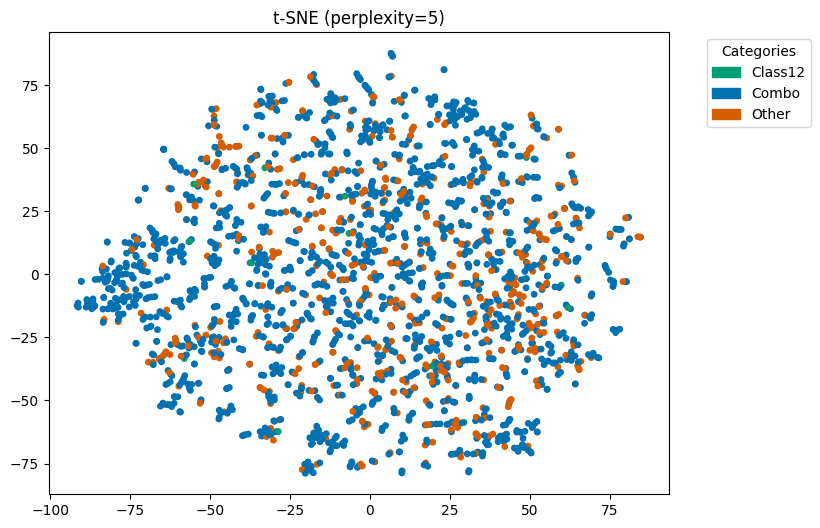

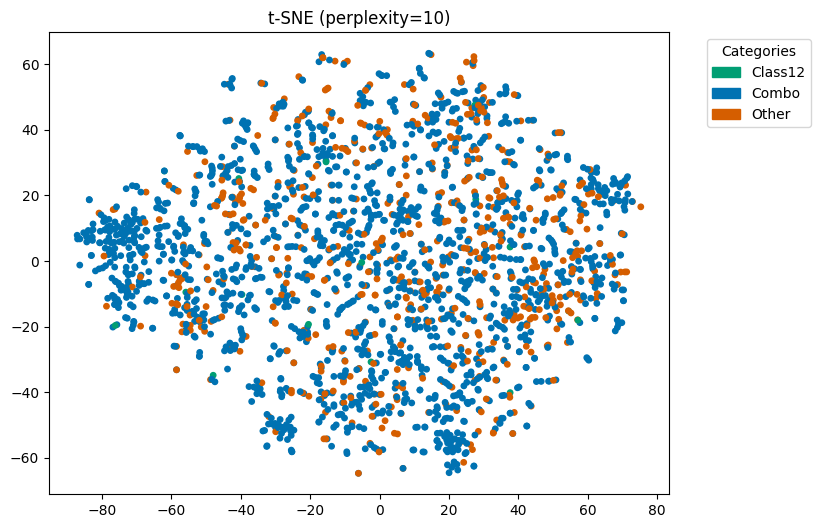

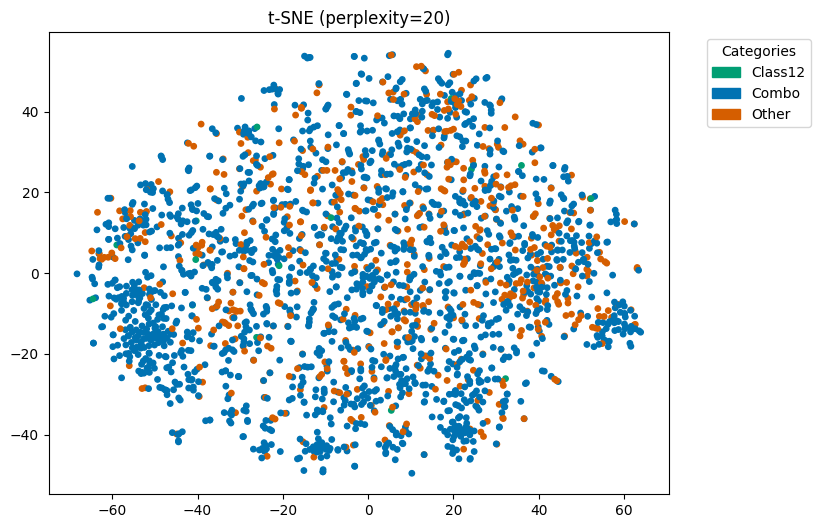

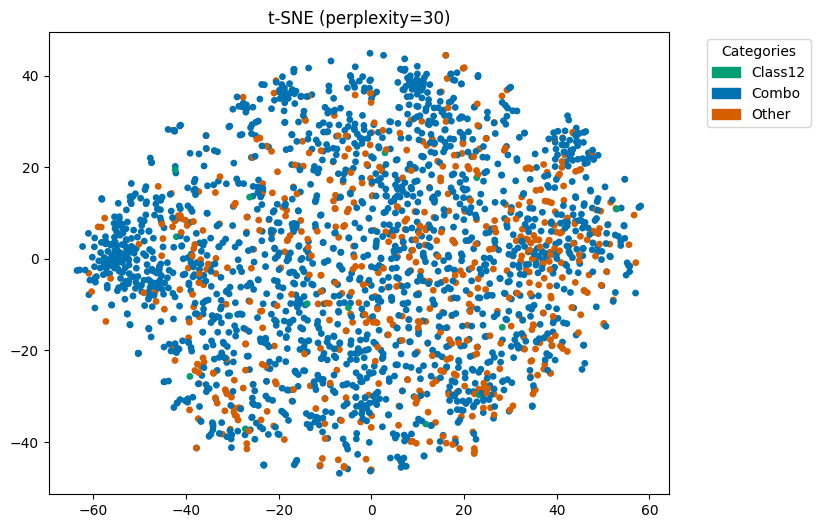

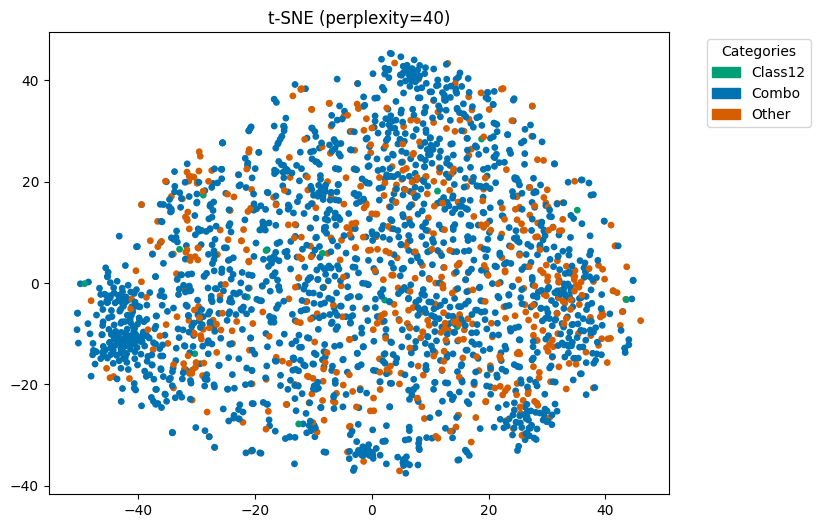

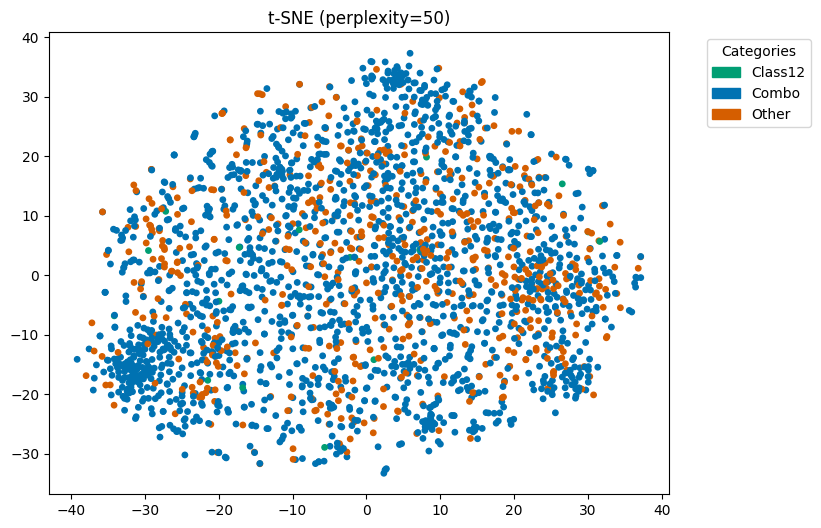

,Perplexity,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,5,-0.054477,4.996641,94.300126
1,10,-0.032460,11.709381,49.217321
2,20,-0.028478,14.506438,7.585136
3,30,-0.035032,15.739990,7.566473
4,40,-0.045527,9.625618,21.929902
5,50,-0.058627,6.564945,14.565470


In [9]:
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, init="pca", random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors, s=15)
    handles = [mpatches.Patch(color=okabe_ito[i % len(okabe_ito)], label=cat) 
           for i, cat in enumerate(unique_cats)]
    plt.title(f"t-SNE (perplexity={p})")
    plt.legend(handles=handles, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    labels = pd.Categorical(categories).codes
    
    sil = silhouette_score(X_tsne, labels)
    ch = calinski_harabasz_score(X_tsne, labels)
    db = davies_bouldin_score(X_tsne, labels)
    
    results_tsne.append({"Perplexity": p, 
                    "Silhouette": sil, 
                    "Calinski-Harabasz": ch, 
                    "Davies-Bouldin": db})

results_df = pd.DataFrame(results_tsne)
display(results_df)

We experimented with perplexities of 5, 10, 20, 30, 40, and 50 and evaluated the embeddings using Silhouette, Calinski–Harabasz, and Davies–Bouldin indices.

 * Silhouette values were negative across all perplexities, confirming that the Yeast dataset has highly overlapping classes in the 2D embedding.
 * The **Calinski–Harabasz index peaked at perplexity = 30 (15.74)**, indicating relatively better cluster separation.
 * The **Davies–Bouldin index was lowest at perplexity = 30 (7.56)**, showing the most compact and distinct clusters at that setting.

 Based on both quantitative metrics and visual inspection, we selected **perplexity = 30** as our final choice, since it best balances local and global structure in the embedding.




### 🔹 Veracity Inspection

**1. Noisy / Ambiguous Labels**
In the t-SNE plot, we observe data points of one category embedded within clusters dominated by a different category. For example, some `"Combo"`-labeled points appear inside clusters of `"class12"` or `"other"`. This suggests that gene expression patterns for these samples resemble those of another functional class, possibly because:

* the gene truly plays multiple biological roles (multi-functionality), or
* the labeling is ambiguous or noisy in the dataset.

These cases highlight the inherent challenge of **multi-label classification**, where the same feature space may correspond to more than one label.

---

**2. Outliers**
Several isolated points or tiny, distant clusters appear far away from the main groupings in both t-SNE and Isomap embeddings. These may correspond to:

* **rare expression profiles** (genes behaving very differently under certain conditions),
* **experimental noise** (measurement errors or batch effects), or
* **true biological novelty** (uncharacterized pathways or unique regulation patterns).

Such outliers can skew classifier training if not handled properly, since models may try to overfit these rare points.

---

**3. Hard-to-Learn Samples**
There are dense regions where multiple colors overlap heavily, especially in the core clusters. In these areas, samples from different functional classes are thoroughly intermixed, meaning their expression signatures are very similar. A simple classifier (e.g., logistic regression or decision tree) would struggle here because the decision boundary is highly non-linear and ambiguous.

This overlap reflects the **complexity of the biological manifold**: different gene functions are entangled in expression space, making it difficult for algorithms to cleanly separate them.



# Isomap and Manifold Learning
* **Isomap**

  * Preserves **global structure**.
  * It constructs a neighborhood graph and computes **geodesic distances** (shortest paths along the manifold) between all points.
  * Then it embeds the data so that these global manifold distances are preserved as faithfully as possible.
  * As a result, Isomap is good at revealing the **overall shape** of the data manifold (e.g., whether it is curved, connected, or continuous).

* **t-SNE**

  * Preserves **local structure**.
  * It models pairwise similarities between nearby points using probability distributions and tries to keep neighbors close in the low-dimensional space.
  * It does not care much about preserving global distances; faraway clusters can be arbitrarily spaced.
  * This makes t-SNE excellent at showing **local neighborhoods and small clusters**, but poor at representing the true global geometry.


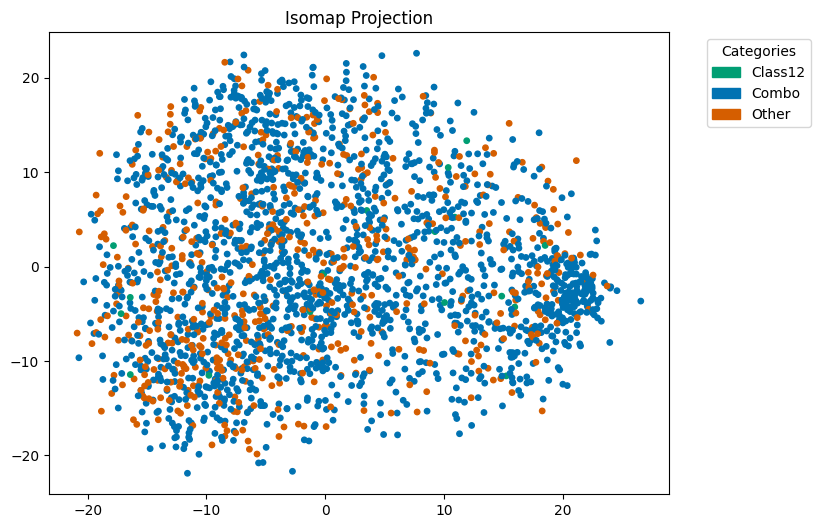

,Perplexity,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,50,-0.051446,9.877471,11.817671


In [10]:
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_scaled)
results_isomap = []
plt.figure(figsize=(8,6))
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=colors, s=15)
handles = [mpatches.Patch(color=okabe_ito[i % len(okabe_ito)], label=cat) 
        for i, cat in enumerate(unique_cats)]
plt.title("Isomap Projection")
plt.legend(handles=handles, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
labels = pd.Categorical(categories).codes

sil = silhouette_score(X_isomap, labels)
ch = calinski_harabasz_score(X_isomap, labels)
db = davies_bouldin_score(X_isomap, labels)

results_isomap.append({"Perplexity": p, 
                "Silhouette": sil, 
                "Calinski-Harabasz": ch, 
                "Davies-Bouldin": db})

results_df_isomap = pd.DataFrame(results_isomap)
display(results_df_isomap)


### **Comparison**

**Isomap is better at revealing the global structure of the gene expression data.**

* **t-SNE (t-Distributed Stochastic Neighbor Embedding):** The t-SNE plot excels at visualizing **local structure**. It creates well-defined, tight clusters by focusing on preserving the similarities between a point and its immediate neighbors. However, this comes at a cost: the relative positions and distances between these separate clusters are not meaningful. You can see many small, distinct groups in the t-SNE image, but you cannot infer how these groups relate to each other on a larger scale.

* **Isomap (Isometric Mapping):** Isomap, on the other hand, is designed to preserve **global structure**. It approximates the "geodesic distance"—the shortest path between two points along the curve of the data manifold, rather than a straight line through the high-dimensional space. The resulting Isomap plot attempts to "unroll" the manifold. While it might not create clusters as tight as t-SNE, the overall shape and the relative positions of points across the entire plot are more representative of the data's large-scale relationships. The Isomap visualization shows a more continuous, spread-out structure, giving a better sense of the overall data landscape.

---

### The Data Manifold and Classification Difficulty 

The concept of a **data manifold** posits that in a very high-dimensional space (like that of gene expression), most data points don't just exist randomly. Instead, they lie on or near a lower-dimensional, often curved, surface embedded within that high-dimensional space.

A helpful analogy is the surface of the Earth: it's a 2D manifold (you can describe any point with latitude and longitude) that is curved within 3D space. The shortest travel distance between two cities is not a straight line through the Earth's core, but the "geodesic" path along its curved surface.


* **Manifold Complexity:** **Yes, the Isomap plot suggests a highly curved or complex manifold.** A simple manifold would look like a flat plane, a straight line, or a simple, smooth curve. The Isomap visualization, which is an attempt to flatten this manifold, is not a simple shape. The data points form a somewhat amorphous, irregular cloud where the different categories (`Combo`, `Other`, `Class12`) are heavily intermingled. This indicates that the underlying structure is not simple and that the boundaries between the classes on this manifold are intricate and non-linear.

* **Relation to Classification Difficulty:** The complexity of the manifold directly relates to the difficulty of classification.
    * **Simple Manifold:** If the classes occupied distinct, separate regions on a simple, flat manifold, a straightforward linear classifier could easily draw a line or plane to separate them.
    * **Complex Manifold:** Because the Isomap plot shows the classes are heavily mixed, it implies that on the original manifold, the decision boundary required to separate them is highly complex and convoluted. A simple model would fail because it cannot capture this intricate boundary. Therefore, a **more complex and intertwined manifold makes classification significantly harder**, requiring more sophisticated, non-linear models (e.g., Kernel SVM, Random Forests, or Neural Networks) to achieve high accuracy.